<a href="https://colab.research.google.com/github/CakeNuthep/Create_Knowledge_Graph/blob/main/pubmed_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#disk information
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   45G  182G  20% /
tmpfs            64M     0   64M   0% /dev
tmpfs            13G     0   13G   0% /sys/fs/cgroup
shm              13G     0   13G   0% /dev/shm
tmpfs            13G   24K   13G   1% /var/colab
/dev/sda1       233G   51G  182G  22% /etc/hosts
tmpfs            13G     0   13G   0% /proc/acpi
tmpfs            13G     0   13G   0% /proc/scsi
tmpfs            13G     0   13G   0% /sys/firmware
drive            15G   13G  2.2G  86% /content/drive


In [ ]:
#GPU
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
#Memory
!cat /proc/meminfo

MemTotal:       26751700 kB
MemFree:        21168672 kB
MemAvailable:   25563408 kB
Buffers:           42196 kB
Cached:          4567396 kB
SwapCached:            0 kB
Active:           808144 kB
Inactive:        4414240 kB
Active(anon):     584300 kB
Inactive(anon):      396 kB
Active(file):     223844 kB
Inactive(file):  4413844 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1052 kB
Writeback:             0 kB
AnonPages:        612796 kB
Mapped:           192408 kB
Shmem:               988 kB
Slab:             220892 kB
SReclaimable:     160720 kB
SUnreclaim:        60172 kB
KernelStack:        5344 kB
PageTables:         6888 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375848 kB
Committed_AS:    4011588 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             2048 kB
AnonHugePages:   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -m pip install dask[dataframe] --upgrade

Requirement already up-to-date: dask[dataframe] in /usr/local/lib/python3.7/dist-packages (2021.4.0)


In [ ]:
!pip install memory_profiler

In [ ]:
# import pandas as pd
import dask
import dask.dataframe as dd

In [ ]:
# dask.config.set(scheduler='processes')

# Convert String to JSON

## Check point 1

In [ ]:
path_file = '/content/drive/MyDrive/KnowledgeGraph/Json_researcher/pubmed.json'

In [ ]:
path_file_save = '/content/pubmed.json'

In [ ]:


f = open(path_file, "r",encoding="utf8")
count = 0
content = []
string_json = ''
begin = '['
end = ']'
split = ','

string_json += begin
while(True):
    # Read a line.
    line = f.readline()
    # When readline returns an empty string, the file is fully read.
    if line == "":
        print("::DONE::")
        break

    if count % 100000 == 0:
        #write file
        file_save=open(path_file_save,"a+",encoding="utf8")
        file_save.write(string_json)
        file_save.close()
        string_json = ''
        print(f"count:{count}")

    if count != 0:
      string_json += split
    string_json += line
    content.append(line)
    count +=1


string_json += end
file_save=open(path_file_save,"a+",encoding="utf8")
file_save.write(string_json)
file_save.close()
f.close()
print(f"count:{count}")

count:0
count:100000
count:200000
count:300000
count:400000
count:500000
count:600000
count:700000
count:800000
count:900000
count:1000000
count:1100000
count:1200000
count:1300000
count:1400000
count:1500000
count:1600000
count:1700000
count:1800000
count:1900000
count:2000000
count:2100000
count:2200000
count:2300000
count:2400000
count:2500000
count:2600000
count:2700000
count:2800000
count:2900000
count:3000000
count:3100000
count:3200000
count:3300000
count:3400000
count:3500000
count:3600000
count:3700000
count:3800000
::DONE::
count:3856000


In [ ]:
content[0]

'{"_index":"pubmed","_type":"pubmed","_id":"365901","_score":1,"_source":{"Status":"MEDLINE","Owner":"NLM","PMID":365901,"DateCompleted":"1979-03-13","DateRevised":"2009-11-19","ISSN":"0022-006X","JournalIssue":{"Volume":"46","Issue":"6","PubDate":"1978-Dec"},"Title":"Journal of consulting and clinical psychology","ISOAbbreviation":"J Consult Clin Psychol","ArticleTitle":"Comparison of electromyographic feedback and progressive relaxation training in treating circumscribed anxiety stress reactions.","Pagination":"1291-8","AuthorList":[{"LastName":"Miller","ForeName":"M P","Initials":"MP"},{"LastName":"Murphy","ForeName":"P J","Initials":"PJ"},{"LastName":"Miller","ForeName":"T P","Initials":"TP"}],"Language":"eng","GrantList":[],"PublicationTypeList":["Journal Article"],"MedlineJournalInfo":{"Country":"United States","MedlineTA":"J Consult Clin Psychol","NlmUniqueID":"0136553","ISSNLinking":"0022-006X"},"ChemicalList":[],"CitationSubset":"IM","MeshHeadingList":[{"DescriptorName":"Adult

## Check point 2

In [ ]:
# import json
# # data = json.loads(string_json)

# with open(path_file_save) as f:
#     data = json.load(f)

In [ ]:
!pip install ijson

In [ ]:
import ijson

count_json = 0
with open(path_file_save,encoding="utf8") as f:
  parser = ijson.parse(f)
  for prefix, type_of_object, value in parser:
    print(prefix, type_of_object, value)
    count_json += 1
    if count_json > 100:
      break

 start_array None
item start_map None
item map_key _index
item._index string pubmed
item map_key _type
item._type string pubmed
item map_key _id
item._id string 365901
item map_key _score
item._score number 1
item map_key _source
item._source start_map None
item._source map_key Status
item._source.Status string MEDLINE
item._source map_key Owner
item._source.Owner string NLM
item._source map_key PMID
item._source.PMID number 365901
item._source map_key DateCompleted
item._source.DateCompleted string 1979-03-13
item._source map_key DateRevised
item._source.DateRevised string 2009-11-19
item._source map_key ISSN
item._source.ISSN string 0022-006X
item._source map_key JournalIssue
item._source.JournalIssue start_map None
item._source.JournalIssue map_key Volume
item._source.JournalIssue.Volume string 46
item._source.JournalIssue map_key Issue
item._source.JournalIssue.Issue string 6
item._source.JournalIssue map_key PubDate
item._source.JournalIssue.PubDate string 1978-Dec
item._source.Jo

In [ ]:
# with open(path_file_save,encoding="utf8") as f:
#   objects = ijson.items(f, 'item')
#   datas = (o for o in objects)
#   for data in datas:
#     print(f"{data['_index']},{data['_id']},{data['_source']['Title']}")

In [ ]:
def has_key(dic,key):
  if key in dic:
    return True
  return False

In [ ]:
good_columns = [
    "sourceName",
    "source_ID",
    "paperID",
    "paperTitle",
    "paperType",
    "paperPage",
    "publishedDate",
    "bookName",
    "bookNo",
    "bookVolume",
    "ISSN",
    "LastName",
    "ForeName",
    "Initials",
    "firstAuthor"]
data = []
with open(path_file_save, 'r',encoding='utf8') as f:
    objects = ijson.items(f, 'item')
    for row in objects:
        sourceName = row['_index']
        sourceID = row['_id']
        paperID = row['_source']['PMID']
        paperTitle = row['_source']['ArticleTitle']

        paperType = row['_source']['PublicationTypeList']

        if has_key(row['_source'],'Pagination'):
          paperPage = row['_source']['Pagination']
        
        if has_key(row['_source']['JournalIssue'],'PubDate'):
          publishedDate = row['_source']['JournalIssue']['PubDate']
        bookName = row['_source']['Title']

        if has_key(row['_source']['JournalIssue'],'Issue'):
          bookNo = row['_source']['JournalIssue']['Issue']
        
        if has_key(row['_source']['JournalIssue'],'Volume'):
          bookVolume = row['_source']['JournalIssue']['Volume']

        if has_key(row['_source'],'ISSN'):
          issn = row['_source']['ISSN']

        authorList = row['_source']['AuthorList']
        if len(authorList) > 0:
          for indexAuthor in range(len(authorList)):
            name = authorList[indexAuthor]
            firstAuthor = False
            if indexAuthor == 0:
              firstAuthor = True
            lastName = ""
            foreName = ""
            initials = ""
            if has_key(name,'LastName'):
              lastName = name['LastName']
            if has_key(name,'ForeName'):
              foreName = name['ForeName']
            if has_key(name,'Initials'):
              initials = name['Initials']
            selected_row = [sourceName,sourceID,paperID,paperTitle,paperType,paperPage,publishedDate,bookName,bookNo,bookVolume,issn,lastName,foreName,initials,firstAuthor]
            data.append(selected_row)
        else:
          selected_row = [sourceName,sourceID,paperID,paperTitle,paperType,paperPage,publishedDate,bookName,bookNo,bookVolume,issn,"","","",True]
          data.append(selected_row)

In [ ]:
data[0:1000]

[['pubmed',
  '365901',
  365901,
  'Comparison of electromyographic feedback and progressive relaxation training in treating circumscribed anxiety stress reactions.',
  ['Journal Article'],
  '1291-8',
  '1978-Dec',
  'Journal of consulting and clinical psychology',
  '6',
  '46',
  '0022-006X',
  'Miller',
  'M P',
  'MP',
  True],
 ['pubmed',
  '365901',
  365901,
  'Comparison of electromyographic feedback and progressive relaxation training in treating circumscribed anxiety stress reactions.',
  ['Journal Article'],
  '1291-8',
  '1978-Dec',
  'Journal of consulting and clinical psychology',
  '6',
  '46',
  '0022-006X',
  'Murphy',
  'P J',
  'PJ',
  False],
 ['pubmed',
  '365901',
  365901,
  'Comparison of electromyographic feedback and progressive relaxation training in treating circumscribed anxiety stress reactions.',
  ['Journal Article'],
  '1291-8',
  '1978-Dec',
  'Journal of consulting and clinical psychology',
  '6',
  '46',
  '0022-006X',
  'Miller',
  'T P',
  'TP',


In [ ]:
import numpy as np

# arr = np.array(data)
# df = dd.from_array(np.array(data[:100000]), columns=good_columns)
df = dd.from_array(np.array(data), columns=good_columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
df

,sourceName,source_ID,paperID,paperTitle,paperType,paperPage,publishedDate,bookName,bookNo,bookVolume,ISSN,LastName,ForeName,Initials,firstAuthor
npartitions=2,,,,,,,,,,,,,,,
0,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
50000,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
def release_list(a):
   del a[:]
   del a

In [ ]:
release_list(data)

# Separate

In [ ]:
# df['paperType'] = df.paperType.apply(lambda x: x[1:-1].split(','))
df = df.explode('paperType')

In [ ]:
df

,sourceName,source_ID,paperID,paperTitle,paperType,paperPage,publishedDate,bookName,bookNo,bookVolume,ISSN,LastName,ForeName,Initials,firstAuthor
npartitions=2,,,,,,,,,,,,,,,
0,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
50000,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
# df.compute()

# Check Language

In [ ]:
def is_english(str):
    for i in str:
        if i in ('A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'):
            return True
    else:    
        return False

def is_thai(str):
    for i in str:
        if i in ('ก','ข','ฃ','ค','ฅ','ฆ','ง','จ','ฉ','ช','ซ','ฌ','ญ','ฎ','ฏ','ฐ','ฑ','ฒ','ณ','ด','ต','ถ','ท','ธ','น','บ','ป','ผ','ฝ','พ','ฟ','ภ','ม','ย','ร','ล','ว','ศ','ษ','ส','ห','ฬ','อ','ฮ'):
            return True
    else:
        return False

def language(text):
    if is_english(text):
      return 'eng'
    elif is_thai(text):
      return 'th'
    else:
      return 'other'

In [ ]:
# df['language'] = df['LastName'].apply(language)

In [ ]:
# df.head()

# create Author Table

In [ ]:
def concatName(row):
  row['authFullName'] = row['ForeName'].strip() + ' ' + row['LastName'].strip()
  return row

In [ ]:
df = df.apply(concatName,axis=1)

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:4681: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta={'sourceName': 'object', 'source_ID': 'object', 'paperID': 'object', 'paperTitle': 'object', 'paperType': 'object', 'paperPage': 'object', 'publishedDate': 'object', 'bookName': 'object', 'bookNo': 'object', 'bookVolume': 'object', 'ISSN': 'object', 'LastName': 'object', 'ForeName': 'object', 'Initials': 'object', 'firstAuthor': 'object', 'authFullName': 'object'})

  warnings.warn(meta_warning(meta))


In [ ]:
# df.head()

In [ ]:
# uniq_name = df[['authFullName','ForeName','LastName']].unique()
df_unique_name = df[['authFullName','ForeName','LastName']].drop_duplicates()
df_unique_name = df_unique_name.reset_index()

In [ ]:
# df_unique_name.head()

In [ ]:
# df_unique_name = uniq_name.to_frame()

In [ ]:
df_unique_name

,index,authFullName,ForeName,LastName
npartitions=1,,,,
,int64,object,object,object
,...,...,...,...


In [ ]:
start_id = 606480
df_unique_name['id'] = df_unique_name.index + start_id

In [ ]:
df_unique_name.head()

,index,authFullName,ForeName,LastName,id
0,0,M P Miller,M P,Miller,606480
1,1,P J Murphy,P J,Murphy,606481
2,2,T P Miller,T P,Miller,606482
3,3,C I Levene,C I,Levene,606483
4,4,B R Zetter,B R,Zetter,606484


In [ ]:
# result_thai = dd.merge(df_thai,
#                        df_unique_name,
#                        left_on='clean_name',
#                        right_on='clean_name',
#                        how='left')

# result_eng = dd.merge(df_eng,
#                        df_unique_name,
#                        left_on='clean_name',
#                        right_on='clean_name',
#                        how='left')

# result_other = dd.merge(df_other,
#                        df_unique_name,
#                        left_on='clean_name',
#                        right_on='clean_name',
#                        how='left')

result_all = dd.merge(df,
                       df_unique_name[['authFullName','id']],
                       left_on='authFullName',
                       right_on='authFullName',
                       how='left')

# Create Publish

## Create Publish All

In [ ]:
result_all.columns

Index(['sourceName', 'source_ID', 'paperID', 'paperTitle', 'paperType',
       'paperPage', 'publishedDate', 'bookName', 'bookNo', 'bookVolume',
       'ISSN', 'LastName', 'ForeName', 'Initials', 'firstAuthor',
       'authFullName', 'id'],
      dtype='object')

In [ ]:
result_all = result_all.rename(columns={"id": "auth_ID", "paperID": "paper_ID"})

In [ ]:
# result_all = result_all.drop(['LastName', 'ForeName', 'Initials',
#        'authFullName',],axis=1)
result_all = result_all.drop([ 'Initials'],axis=1)

In [ ]:
# result_all.head()

In [ ]:
result_all.columns

Index(['sourceName', 'source_ID', 'paper_ID', 'paperTitle', 'paperType',
       'paperPage', 'publishedDate', 'bookName', 'bookNo', 'bookVolume',
       'ISSN', 'LastName', 'ForeName', 'firstAuthor', 'authFullName',
       'auth_ID'],
      dtype='object')

In [ ]:
# result_all.head()

In [ ]:
# result_all['auth_ID'] = ''
# result_all["firstAuthor"] = ''
result_all['sourceName'] = 'pubmed'
# result_all['paperType'] = ''

# result_all['paper_ID']=''
# result_all['paperTitle']=''
result_all['paperAbtract_th'] = ''
result_all['paperAbtract_en'] = ''
result_all['paperKeywords'] = ''
# result_all['paperPage'] = ''
# result_all['publishedDate'] = ''
result_all['publishedYear'] = ''
result_all['publisherName'] = ''
# result_all['bookName'] = ''
# result_all['bookNo'] = ''
# result_all['bookVolume'] = ''

result_all['bookEditor'] = ''
result_all['bookSeries'] = ''
result_all['Fund'] = ''
result_all['DOI'] = ''
# result_all['ISSN'] = ''
result_all['citation'] = ''
result_all['refURL']=''
result_all['crossRef'] = ''

In [ ]:
# all_column =  ["auth_ID","firstAuthor","sourceName","source_ID","paper_ID",
#                "paperTitle","paperType","paperAbtract_th","paperAbtract_en",
#                "paperKeywords","paperPage","publishedDate","publishedYear",
#                "publisherName","bookName","bookNo","bookVolume","bookEditor",
#                "bookSeries","Fund","DOI","ISSN","citation","refURL","crossRef"]
all_column =  ["auth_ID","firstAuthor","sourceName","source_ID","paper_ID",
               "paperTitle","paperType","paperAbtract_th","paperAbtract_en",
               "paperKeywords","paperPage","publishedDate","publishedYear",
               "publisherName","bookName","bookNo","bookVolume","bookEditor",
               "bookSeries","Fund","DOI","ISSN","citation","refURL","crossRef",
               'authFullName','ForeName','LastName']
len(all_column)

28

In [ ]:
len(result_all.columns)

28

In [ ]:
result_all = result_all[all_column]

In [ ]:
# result_all.head()

# Export Publish

## Check point 3

In [ ]:
def indexName(df, name):
    df.index.name = name
    return df

In [ ]:
# result_thai.index.name = 'id'
# result_eng.index.name = 'id'
# result_other.index.name = 'id'
result_all = result_all.map_partitions(indexName,'id')

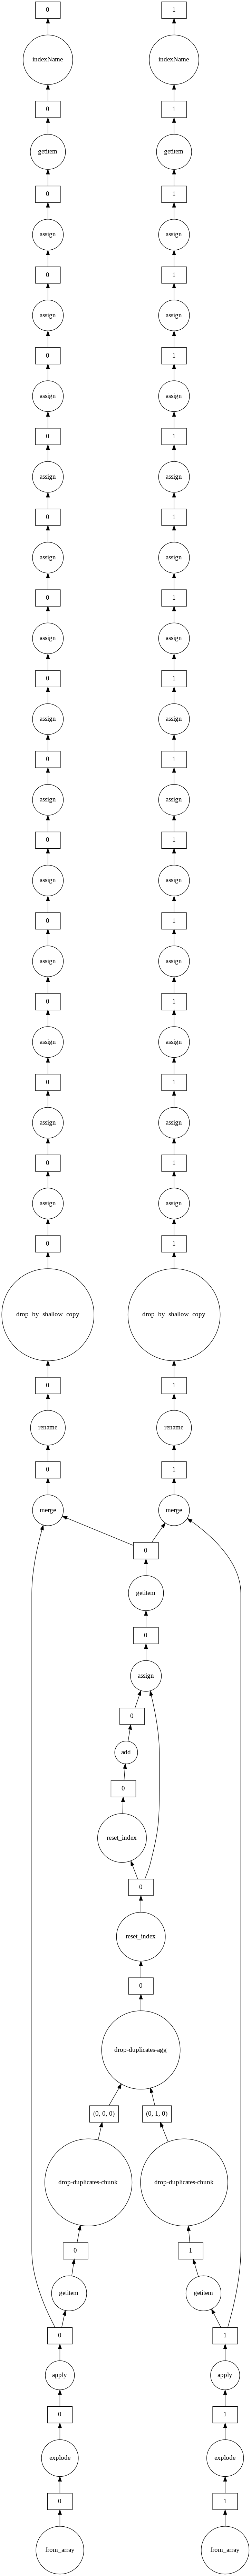

In [ ]:
result_all.visualize()

In [ ]:
# result_thai.to_csv('pubmed_publish_thai.csv')
# result_eng.to_csv('pubmed_publish_eng.csv')
# result_other.to_csv('pubmed_publish_other.csv')
result_all.to_csv('/content/pubmed/Publish/pubmed_publish_all_*.csv')
!cp -R /content/pubmed/Publish/* /content/drive/MyDrive/KnowledgeGraph/Integrated/pubmed/publish





# df_author

## Check point 4

In [ ]:
path_file = '/content/pubmed/Publish/pubmed_publish_all_*.csv'

In [ ]:
result_all = dd.read_csv(path_file).set_index('id')

In [ ]:
df_unique_name = result_all[['auth_ID','authFullName','ForeName','LastName']]

In [ ]:
df_unique_name = df_unique_name.drop_duplicates()

In [ ]:
df_unique_name = df_unique_name.rename(columns={"auth_ID": "id"})

In [ ]:
# df_unique_name['language'] = df_unique_name['authFullName'].apply(language)

df_unique_name['language'] = df_unique_name['authFullName'].apply(language)
df_unique_name = df_unique_name.rename(columns={"ForeName": "authFirstName","LastName":"authLastName"})

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:3519: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('authFullName', 'object'))

  warnings.warn(meta_warning(meta))


In [ ]:
result_author_thai = df_unique_name[df_unique_name['language']=='th']

result_author_eng = df_unique_name[df_unique_name['language']=='eng']

result_author_other = df_unique_name[df_unique_name['language']=='other']

In [ ]:
result_author_thai

,id,authFullName,authFirstName,authLastName,language
npartitions=1,,,,,
,int64,object,object,object,object
,...,...,...,...,...


In [ ]:
result_author_eng

,id,authFullName,authFirstName,authLastName,language
npartitions=1,,,,,
,int64,object,object,object,object
,...,...,...,...,...


In [ ]:
result_author_other

,id,authFullName,authFirstName,authLastName,language
npartitions=1,,,,,
,int64,object,object,object,object
,...,...,...,...,...


In [ ]:
result_author_thai = df_unique_name[df_unique_name['language']=='th']

result_author_eng = df_unique_name[df_unique_name['language']=='eng']

result_author_other = df_unique_name[df_unique_name['language']=='other']





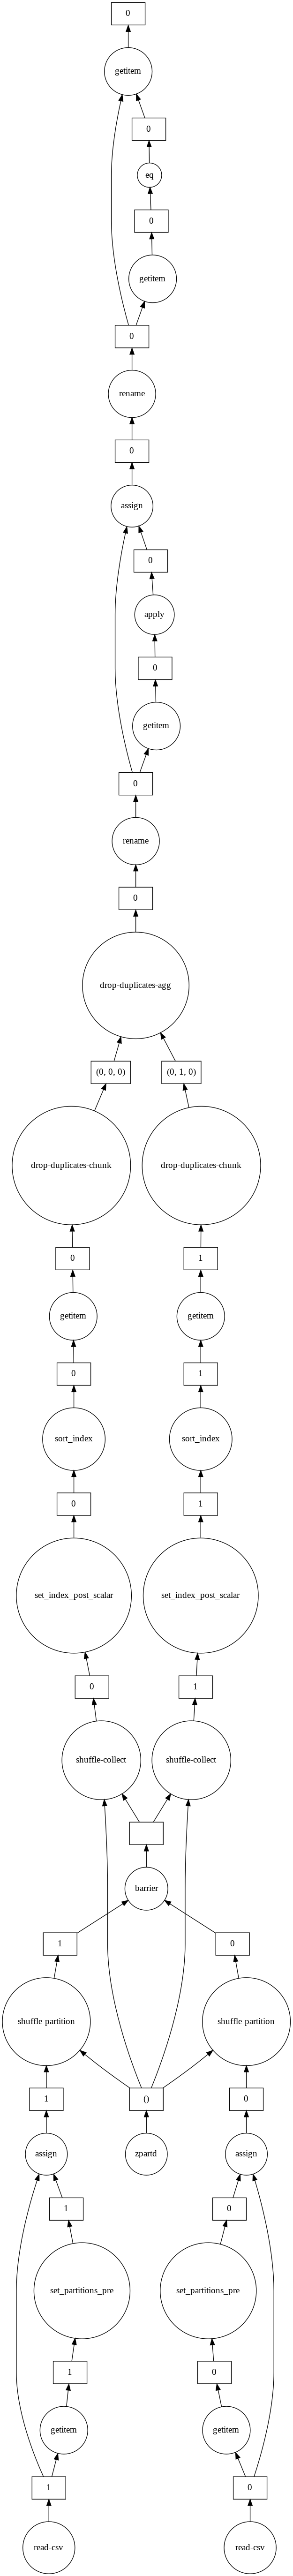

In [ ]:
result_author_eng.visualize()

In [ ]:
# ,'authFirstName','authLastName'
result_author_eng[['id','authFullName','authFirstName','authLastName']].to_csv('/content/pubmed/authorEN/pubmed_author_eng_*.csv')
!cp -R /content/pubmed/authorEN/* /content/drive/MyDrive/KnowledgeGraph/Integrated/pubmed/authorEN

result_author_thai[['id','authFullName','authFirstName','authLastName']].to_csv('/content/pubmed/authorTH/pubmed_author_thai_*.csv')
!cp -R /content/pubmed/authorTH/* /content/drive/MyDrive/KnowledgeGraph/Integrated/pubmed/authorTH

result_author_other[['id','authFullName','authFirstName','authLastName']].to_csv('/content/pubmed/authorOther/pubmed_author_other_*.csv')
!cp -R /content/pubmed/authorOther/* /content/drive/MyDrive/KnowledgeGraph/Integrated/pubmed/authorOther